In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
df   #prinf df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.head()   #print first 5 records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail  #print last 5 records

<bound method NDFrame.tail of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Insights
Total records=6362620

Total columns=11

It shows data type of all columns.Data type of 5 columns are float,3 columns are integer and 3 columns are object.




In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Isights
No null values are present in dataset.

In [8]:
#lets have a look at the type of the transaction mention in the dataset.
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
type=df["type"].value_counts()

In [10]:
type


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
transactions=type.index

In [12]:
transactions

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')

In [14]:
quantity=type.values

In [15]:
quantity

array([2237500, 2151495, 1399284,  532909,   41432], dtype=int64)

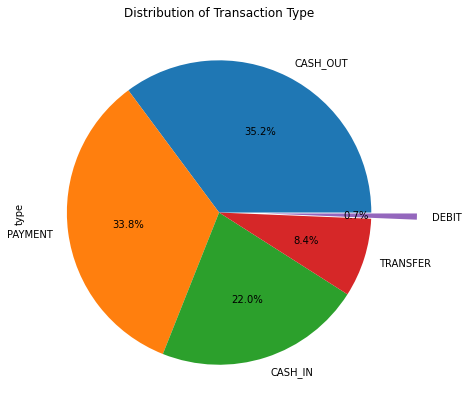

In [30]:
plt.figure(figsize=(7,7))
df["type"].value_counts().plot.pie(autopct="%1.1f%%",explode=(0,0,0,0,0.3))
plt.title("Distribution of Transaction Type")
plt.show()

In [34]:
#Now let’s have a look at the correlation between the features of the data with 
#the isFraud column:
correlation=df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [36]:
#Now let’s transform the categorical features into numerical. Here I will also 
#transform the values of the isFraud column into No Fraud and Fraud labels to 
#have a better understanding of the output:
df["type"]=df["type"].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 
                           'TRANSFER':4, 'DEBIT':5})

In [37]:
df["type"]

0          2
1          2
2          4
3          1
4          2
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64

In [38]:
df["isFraud"]=df["isFraud"].map({0:"No Fraud",1:"Fraud"})
df["isFraud"]

0          No Fraud
1          No Fraud
2             Fraud
3             Fraud
4          No Fraud
             ...   
6362615       Fraud
6362616       Fraud
6362617       Fraud
6362618       Fraud
6362619       Fraud
Name: isFraud, Length: 6362620, dtype: object

In [39]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [50]:
## splitting the data
x=df[["type","amount","oldbalanceOrg","newbalanceOrig"]]
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.00,160296.36
1,2,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,1,181.00,181.00,0.00
4,2,11668.14,41554.00,29885.86
...,...,...,...,...
6362615,1,339682.13,339682.13,0.00
6362616,4,6311409.28,6311409.28,0.00
6362617,1,6311409.28,6311409.28,0.00
6362618,4,850002.52,850002.52,0.00


In [51]:
y=df[["isFraud"]]
y

,isFraud
0,No Fraud
1,No Fraud
2,Fraud
3,Fraud
4,No Fraud
...,...
6362615,Fraud
6362616,Fraud
6362617,Fraud
6362618,Fraud


In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9996856640817776


In [54]:
#Now let’s classify whether a transaction is a fraud or 
#not by feeding about a transaction into the model:
ypred=model.predict(xtest)

In [55]:
ypred

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

In [56]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']
